# Content
- Binomial Distribution
- Multinomial Distribution
- Poisson Distribution
- Hypergeometric Distribution

**These are distributions that do not follow the normal distribution**.

Need to understand assumptions for considering distribution model as appropriate.

In [136]:
# Imports
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [290]:
# Generic functions
def probability_mass_function(
    statement,
    formula,
    X,
    n
):
    r'''
    Calculate PMF according to given formula (binomial, poisson or hypergeometric).
    '''
    total_probability = 0
    if statement == 'exactly':        
        total_probability = formula.pmf(X)
    elif statement == 'at most':        
        for k in range(0, X + 1):
            print('P(' + str(k) + ')=', formula.pmf(k))
            total_probability += formula.pmf(k)
            if not x:
                n = X
    elif statement == 'at least':
        opposite_probability = 0
        for k in range(0, X):
            opposite_probability += formula.pmf(k)
        total_probability = 1-opposite_probability
            
    return total_probability, n


def mape(
    actual_list,
    predicted_list,
):
    r'''
    Calculate Mean Absolute Percent Error to compare 2 lists (actual vs. predicted values).
    '''
    percentage_error_list = []
    for actual, predicted in zip(actual_list, predicted_list):
        abs_error = abs(actual - predicted)
        percentage_error = abs_error/actual*100
        percentage_error_list.append(percentage_error)

    mape = np.mean(percentage_error_list)
    print('MAPE:', '{:0.2f}%'.format(mape))
    return mape


def display_distribution_chart(
    n,
    formula,
    title,
):
    r'''
    Display distribution in pandas bar chart.
    '''
    x_list = [i for i in range(0, n+1)]        
    y_list = [formula.pmf(i) for i in range(0, n+1)]
    df = pd.DataFrame({
        'X': x_list,
        'probability': y_list
    })
    chart = df.plot(
        x="X",
        y="probability",
        kind='bar', 
        color='#cccccc',
    )
    vals = chart.get_yticks()
    chart.set_yticklabels(['{:,.2%}'.format(y) for y in vals])
    plt.xlabel('X')
    plt.ylabel('probability') 
    plt.title(title)
    plt.legend()
    plt.show()

# Discrete Probability Distribution

**Example:** probability of sales person making 0, 1, 2 or 3 sales per day in order to approximate income.

## Definitions
**Discrete random variable:** finite number of values. As opposed to continuous variable which can take any float.

**Discrete probability distribution:** all values a random variable can take with corresponding probabilities.

In [1]:
def get_frequency_list(input_list):  
    return pd.Series(input_list).value_counts().reset_index().values.tolist()

def get_probability_list(input_list, drop_duplicates=True):
    df = pd.DataFrame(input_list, columns = ['data'])
    df = df.assign(pro=df.data.map(df.data.value_counts(normalize=True)))
    if drop_duplicates:
        df = df.drop_duplicates()
    return df

def get_percentage_change(new, old, n):
    return (new-old)/n

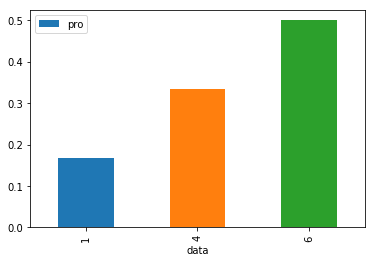

In [156]:
x = [1, 4, 4, 6, 6, 6]
a = get_probability_list(x)

a.plot(
    x='data',
    y='pro',
    kind='bar', 
)
plt.show()

## Formulas
**Mean of probability distribution** = μ = **expected value** = E(X) = ∑X . P(X)

Same as the mean, but in the context of random variable in discrete probability distributions.

**Variance of probability distribution:** σ^2 = ∑[X2 . P(X)] - μ^2

**STD of probability distribution:** σ

# Binomial Distribution
Only 2 possible outcomes: **success (=True) or failure(=False)**.

If problem statement different, need to reduce situation to 2 outcomes.

## Requirements
1. Fixed number of trials (n)
2. Each trial only 2 outcomes (success/failure)
3. Outcomes of each trial must be independent (with replacement)
4. Probability of success must remain the same for each trial

If these 4 requirements are met, then we have a **binomial distribution**.

## Formula

The formula included the p^X . q^(n-X)

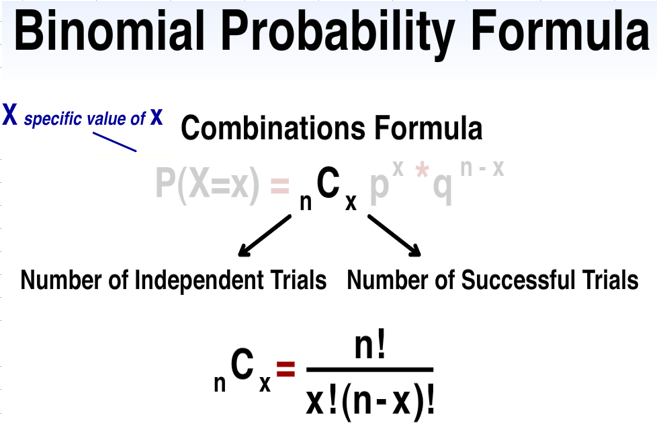

- P(S) = probability of success = p
- P(F) = probability of failure = 1 - p = q
- n = number of trials
- X = number of successes in n trials

## Additional formulas
- **mean**: μ = n . p
- **variance**: σ^2 = n . p . q = μ . q
- **std**: σ

In [259]:
def find_probability_binomial(
    n, # number of trials
    p, # probability of success
    X, # number of successes in n trials (what we want)
    statement='exactly', # 'exactly', 'at least', 'at most',
    show_stats=True,
    show_chart=True,
):
    if statement not in ['exactly', 'at least', 'at most']:
        print('statement keyword wrong')
        return False
    
    # formula and pmf
    formula = stats.binom(n, p)        
    total_probability, n = probability_mass_function(
        statement,
        formula,
        X,
        n
    )
            
    # print stats
    if show_stats:
        mean = n*p
        variance = mean * (1-p)
        std = math.sqrt(variance)
        
        print('P(' + statement + ' ' + str(X) + ')=', '{:0.2f}%'.format(total_probability*100))
        print('μ=', mean)
        print('variance=', variance)
        print('σ=', std)
    
    # show chart
    if show_chart:
        display_distribution_chart(
            n, 
            formula,
            'Binomial Distribution'
        )        

    return total_probability

## Examples

P(exactly 13)= 0.45%
μ= 7.0
variance= 4.55
σ= 2.1330729007701543


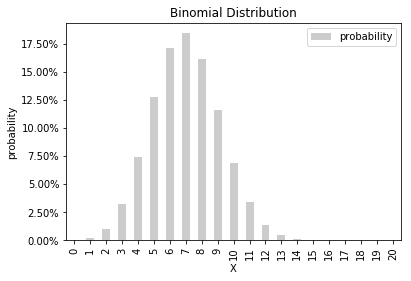

In [260]:
# Teenagers with part-time jobs
# x = find_probability_binomial(
#     n=5,
#     p=.3,
#     X=3,
#     statement='at least'
# )

# Coin tossed 4 times
# x = find_probability_binomial(
#     n=4,
#     p=.5,
#     X=3,
# )

# Excel comparison
x = find_probability_binomial(
    n=20,
    p=.35,
    X=13,
#     statement='at least'
)

# Multinomial Distribution

If > 2 outcomes, otherwise same requirements as binomial distribution.

## Formula

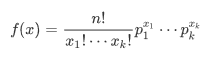

X1 + X2 + ... + Xk = n

p1 + p2 + ... + pk = 1

In [261]:
def find_probability_multinomial(
    n, # number of trials
    p_list, # probabilities of success
    X_list, # number of successes in n trials (in order of p_list)
    show_stats=True,
):
    
    # validate input
    if sum(p_list) != 1:
        print('probabilities must add up to 1')
        return False    
    if sum(X_list) != n:
        print('X values must add up to n', '(' + str(n) + ')')
        return False
    
    # formula and pmf
    formula = stats.multinomial(n, p_list)
    total_probability = formula.pmf(X_list)
     
    # print stats
    if show_stats:
        print('P(' + ','.join(map(str, X_list)) + ')=', '{:0.2f}%'.format(total_probability*100))

    return total_probability  

## Examples
A coffee shop owner found that the probabilities a customer buys 0, 1, 2 or 3 cups of coffee are 0.3, 0.5, 0.15 and 0.05, respectively. If 8 customers enter the shop, find probability that 2 buy other products, 4 buy 1 coffee, 1 buys 2 coffees and 1 buys 3 coffees.

In [197]:
x = find_probability_multinomial(
    n=8,
    p_list=[0.3, 0.5, 0.15,0.05],
    X_list=[2, 4, 1, 1],
)
x

P(2,4,1,1)= 3.54%


0.03543749999999998

# Poisson Distribution
The Poisson distribution is popular for modelling the number of times an event occurs in an interval of time or space. 

**Useful when n is large, p is small and independent variables occur over a period of time.**

The Poisson distribution is useful to model events such as:
- The number of meteorites greater than 1-meter diameter that strike Earth in a year.
- The number of patients arriving in an emergency room between 10 and 11 pm.
- The number of defaults in given length of video tape.
- The number of typos for a given page in a book.

It can be used to approximate the binomial distribution when expected value < 5.

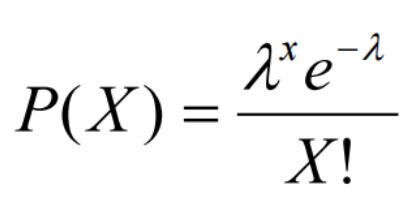

In [262]:
def find_probability_poisson(
    input_lambda, # mean number of occurences per unit
    X, # number of successes (what we want)
    n = None,
    statement='exactly', # 'exactly', 'at least', 'at most',
    show_stats=True,
    show_chart=True,
):
    if statement not in ['exactly', 'at least', 'at most']:
        print('statement keyword wrong')
        return False
    
    # formula and pmf
    formula = stats.poisson(input_lambda)    
    total_probability, n = probability_mass_function(
        statement,
        formula,
        X,
        n
    )
    
    # print stats
    if show_stats:
        print('P(' + statement + ' ' + str(X) + ')=', '{:0.2f}%'.format(total_probability*100))
    
    # show chart
    if show_chart and n:        
        display_distribution_chart(
            n, 
            formula,
            'Poisson Distribution'
        ) 

    return total_probability

## Examples
A sales firm receive, on average, 3 calls per hour. For any given hour, find the probability that:
- Exactly 3 calls
- At most 3 calls
- 5 or more calls

P(at least 5)= 18.47%


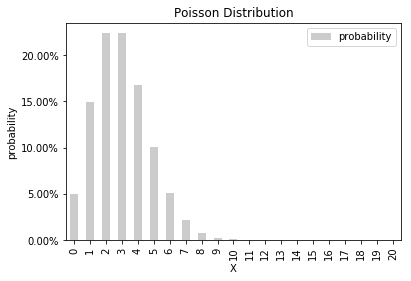

0.18473675547622792

In [263]:
# Exactly 3 calls
# x = find_probability_poisson(
#     3, # mean number of occurences per unit (lambda)
#     3, # number of successes (what we want)
#     None, # n
#     statement='exactly',
# )

# At most 3 calls
# x = find_probability_poisson(
#     3, # mean number of occurences per unit (lambda)
#     3, # number of successes (what we want)
#     None, # n is same as X
#     statement='at most',
# )

# A5 or more calls
x = find_probability_poisson(
    3, # mean number of occurences per unit (lambda)
    5, # number of successes (what we want)
    20, # n is same as X
    statement='at least',
)

x

# Hypergeometric Distribution
When **2 possible outcomes** and sampling is done **without replacement**.

The binomial distribution requires independent trials and is useful only with replacement!

## Formula

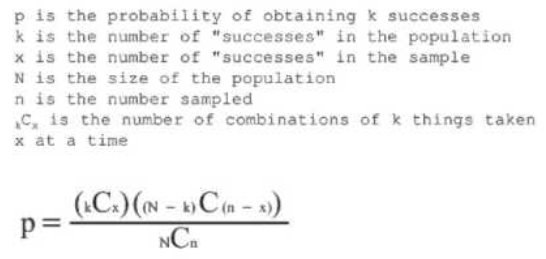

In [266]:
def find_probability_hypergeometric(
    k, # number of successes in the population
    X, # number of successes in the sample (number of items of type k) => what we are looking for
    N, # population size (to do N-k and find number of failures)
    n, # number sampled
    statement='exactly', # 'exactly', 'at least', 'at most',
    show_stats=True,
    show_chart=True,
):
    if statement not in ['exactly', 'at least', 'at most']:
        print('statement keyword wrong')
        return False
    
    # formula and pmf
    formula = stats.hypergeom(N, k, n)     
    total_probability, n = probability_mass_function(
        statement,
        formula,
        X,
        n
    )
    
    # print stats
    if show_stats:
        print('P(' + statement + ' ' + str(X) + ')=', '{:0.2f}%'.format(total_probability*100))
    
    # show chart
    if show_chart:        
        display_distribution_chart(
            n, 
            formula,
            'Hypergeometric Distribution'
        ) 

    return total_probability

## Examples
Lot of 12 tanks is checked for defects. From these 12, 3 are randomly selected for leak check. If >= 1 of the 3 is defective, lot rejected. What is probability of lot being rejected if there are actually 3 defective tanks in the lot?

P(at least 1)= 61.82%


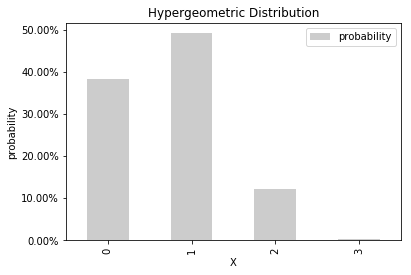

0.6181818181818176

In [269]:
x = find_probability_hypergeometric(
    k=3, # number of successes in the population
    X=1, # number of successes in the sample (number of items of type k) => what we are looking for
    N=12, # population size (to do N-k and find number of failures)
    n=3, # number sampled
    statement='at least', # 'exactly', 'at least', 'at most',
    show_stats=True,
    show_chart=True,
)
x

# Summary Exercise with bombs on London during WW2
Try to find out whether bombs fired randomly or controlled.

Use Poisson distribution to compare actual hits with theoretical hits.

expected value of bombs per region is 1.54
0:  227.53
1:  211.34
2:  98.15
3:  30.39
4:  7.06
5:  1.31
MAPE: 8.56%


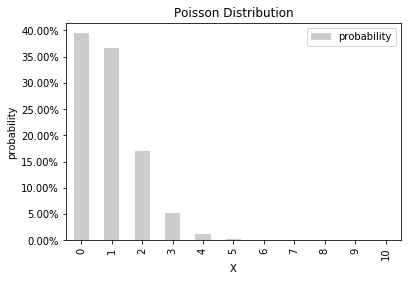

In [291]:
hits =    [0, 1, 2, 3, 4, 5]
regions_actual = [229, 211, 93, 35, 7, 1]
regions_predicted = []
bombs = 535
n = sum(regions_actual)

mean = bombs/n
print('expected value of bombs per region is', round(x*n, 2))

# Calculate predicted values
for k in hits:
    x = find_probability_poisson(
        mean, # mean number of occurences per unit (lambda)
        k, # number of successes (what we want)
        statement='exactly',
        show_stats=False,
        show_chart=False,
    )
    pv = round(x*n, 2)
    regions_predicted.append(pv) 
    print(str(k) + ': ', pv)

# Calculate error
mape(
    actual_list=regions_actual,
    predicted_list=regions_predicted,
)    
    
x = find_probability_poisson(
    mean, # mean number of occurences per unit (lambda)
    5, # number of successes (what we want)
    10, # n is same as X
    statement='at least',
    show_stats=False,
    show_chart=True,
)